
# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**Download the fashion mnist dataset using Keras.**

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,MaxPooling2D, Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

## Visualizing the Data

**Using matplotlib show an any image from the data set.**

In [3]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[1].shape

(28, 28)

<IPython.core.display.Javascript object>

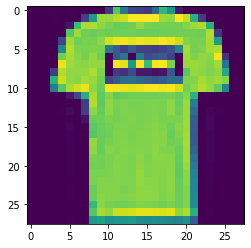

In [6]:
plt.imshow(x_train[1])

In [7]:
x_test.shape

(10000, 28, 28)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

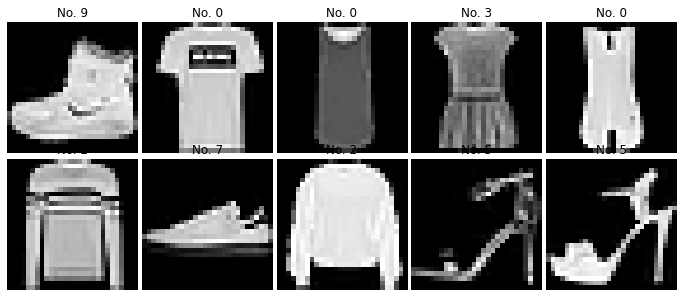

<IPython.core.display.Javascript object>

In [9]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( x_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

In [12]:
x_train[1].max()

255

In [13]:
x_train[1].min()

0

In [3]:
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255

In [4]:
X_train.max()

1.0

In [5]:
X_train.min()

0.0

**Reshape the X into 4 dimension**

In [6]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [7]:
X_train.shape,X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [8]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [25]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_________________________________________________________________


###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [29]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test))

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3996 - accuracy: 0.8578 - val_loss: 0.3163 - val_accuracy: 0.8891
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2704 - accuracy: 0.9031 - val_loss: 0.2923 - val_accuracy: 0.8951
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2297 - accuracy: 0.9177 - val_loss: 0.2707 - val_accuracy: 0.9016
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2073 - accuracy: 0.9265 - val_loss: 0.2716 - val_accuracy: 0.9074
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1883 - accuracy: 0.9329 - val_loss: 0.2569 - val_accuracy: 0.9133
Epoch 6/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1744 - accuracy: 0.9378 - val_loss: 0.2758 - val_accuracy: 0.9117
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1626 - accuracy: 0.9422 - val_loss: 0.2866 -

In [32]:
summary=pd.DataFrame(model.history.history)

In [36]:
summary


,loss,accuracy,val_loss,val_accuracy
0,0.399583,0.857800,0.316252,0.8891
1,0.270429,0.903100,0.292267,0.8951
2,0.229724,0.917683,0.270730,0.9016
3,0.207319,0.926500,0.271602,0.9074
4,0.188266,0.932917,0.256939,0.9133
5,0.174385,0.937850,0.275838,0.9117
6,0.162647,0.942233,0.286572,0.9116
7,0.155563,0.945000,0.272191,0.9108
8,0.145063,0.949017,0.296075,0.9113
9,0.137336,0.952550,0.342258,0.9082


Epoch 1/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1802 - acc: 0.9365
Epoch 2/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1679 - acc: 0.9395
Epoch 3/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.1579 - acc: 0.9439
Epoch 4/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1502 - acc: 0.9469
Epoch 5/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1427 - acc: 0.9496
Epoch 6/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1397 - acc: 0.9523
Epoch 7/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1312 - acc: 0.9551
Epoch 8/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1274 - acc: 0.9559
Epoch 9/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1238 - acc: 0.9582
Epoch 10/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1201 - acc: 0.9588

**Plot values of metrics you used in your model.**

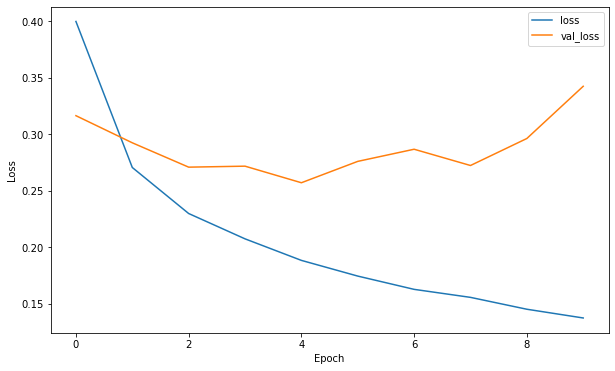

In [43]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()


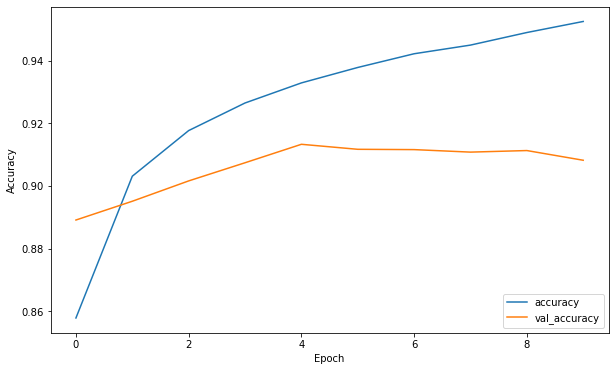

In [48]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="lower right")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()


**Train the model using earlystop.**

In [53]:
early_stop = EarlyStopping(monitor='val_loss',patience=4)

In [54]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1140 - accuracy: 0.9611 - val_loss: 0.3524 - val_accuracy: 0.9076
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1096 - accuracy: 0.9623 - val_loss: 0.3666 - val_accuracy: 0.9135
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1050 - accuracy: 0.9646 - val_loss: 0.4205 - val_accuracy: 0.9082
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1031 - accuracy: 0.9643 - val_loss: 0.3847 - val_accuracy: 0.9109
Epoch 5/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0996 - accuracy: 0.9660 - val_loss: 0.4212 - val_accuracy: 0.9077


**Plot values of metrics you used in your model.**

In [56]:
summary_2=pd.DataFrame(model.history.history)
summary_2

,loss,accuracy,val_loss,val_accuracy
0,0.113970,0.961100,0.352449,0.9076
1,0.109557,0.962317,0.366563,0.9135
2,0.105019,0.964617,0.420472,0.9082
3,0.103115,0.964267,0.384719,0.9109
4,0.099607,0.965967,0.421179,0.9077


255

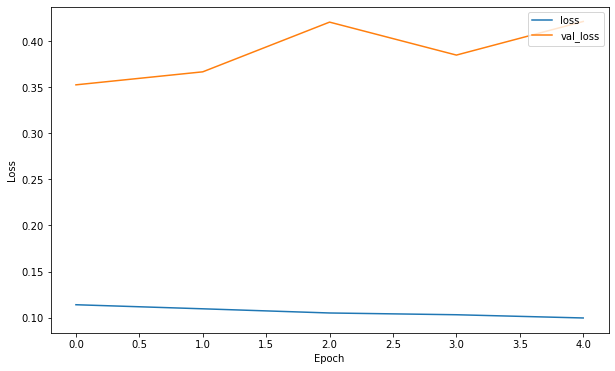

In [57]:
plt.figure(figsize=(10,6))
plt.plot(summary_2.loss, label="loss")
plt.plot(summary_2.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

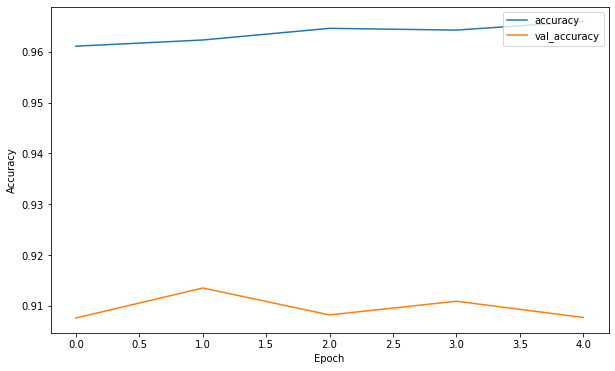

In [58]:
plt.figure(figsize=(10,6))
plt.plot(summary_2.accuracy, label="accuracy")
plt.plot(summary_2.val_accuracy, label="val_accuracy")
plt.legend(loc="upper right")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [60]:
model.metrics_names

['loss', 'accuracy']

['loss', 'acc']

In [59]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 2s 6ms/step - loss: 0.4212 - accuracy: 0.9077
[0.4211788475513458, 0.9077000021934509]


In [63]:
preds = model.predict(X_test)
preds

array([[7.8335470e-14, 1.0148770e-22, 2.3742380e-10, ..., 3.2252651e-06,
        2.0247214e-10, 9.9999666e-01],
       [5.5020129e-12, 1.9404174e-37, 1.0000000e+00, ..., 8.8877694e-32,
        1.7797745e-26, 1.5298903e-33],
       [3.9488825e-14, 1.0000000e+00, 4.6251808e-18, ..., 1.5387369e-22,
        3.4376873e-14, 8.8203359e-21],
       ...,
       [7.0319807e-18, 0.0000000e+00, 2.1354735e-18, ..., 8.4176923e-17,
        1.0000000e+00, 1.9697604e-26],
       [1.0095212e-14, 1.0000000e+00, 7.9566147e-18, ..., 8.5158567e-22,
        9.0550219e-15, 3.7226454e-14],
       [8.8757697e-05, 2.2419191e-07, 5.1423959e-03, ..., 3.4484136e-01,
        9.5632821e-03, 6.0064968e-04]], dtype=float32)

In [64]:
predictions= np.argmax(preds, axis=1)
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [65]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.78      0.90      0.84      1000
           3       0.93      0.88      0.90      1000
           4       0.92      0.80      0.86      1000
           5       0.98      0.97      0.97      1000
           6       0.73      0.80      0.77      1000
           7       0.96      0.95      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [66]:
print(confusion_matrix(y_test, predictions))

[[834   1  40  12   2   1 106   0   4   0]
 [  2 982   4   6   0   0   6   0   0   0]
 [  8   1 904   3  26   1  56   0   1   0]
 [ 19  10  36 877  16   0  40   0   1   1]
 [  0   1  99  21 804   0  74   0   1   0]
 [  1   0   0   1   0 972   0  16   1   9]
 [ 74   0  75  18  27   0 803   0   3   0]
 [  0   0   0   0   0  13   0 952   1  34]
 [  2   1   4   1   0   2  10   2 977   1]
 [  1   0   0   0   0   6   0  20   1 972]]


             precision    recall  f1-score   support

          0       0.86      0.85      0.85      1000
          1       0.99      0.97      0.98      1000
          2       0.88      0.83      0.85      1000
          3       0.91      0.91      0.91      1000
          4       0.83      0.88      0.85      1000
          5       0.97      0.98      0.98      1000
          6       0.73      0.76      0.74      1000
          7       0.95      0.97      0.96      1000
          8       0.99      0.97      0.98      1000
          9       0.98      0.94      0.96      1000

avg / total       0.91      0.91      0.91     10000



#### Predict with dropout and more convulation layer

In [ ]:
#

In [9]:
# Model
model_2 = Sequential()
# Add convolution 2D
model_2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model_2.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model_2.add(Dropout(0.25))
model_2.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model_2.add(Dropout(0.25))
model_2.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model_2.add(Dropout(0.4))
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
# Add dropouts to the model
model_2.add(Dropout(0.3))
model_2.add(Dense(10, activation='softmax'))


model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [11]:
model_2.fit(X_train, Y_train, batch_size=64, epochs=20, validation_split = 0.2)

Epoch 1/20
750/750 [==============================] - 80s 105ms/step - loss: 0.7012 - accuracy: 0.7356 - val_loss: 0.4561 - val_accuracy: 0.8320
Epoch 2/20
750/750 [==============================] - 84s 112ms/step - loss: 0.4585 - accuracy: 0.8322 - val_loss: 0.3488 - val_accuracy: 0.8707
Epoch 3/20
750/750 [==============================] - 86s 115ms/step - loss: 0.3945 - accuracy: 0.8555 - val_loss: 0.3158 - val_accuracy: 0.8848
Epoch 4/20
750/750 [==============================] - 87s 116ms/step - loss: 0.3566 - accuracy: 0.8683 - val_loss: 0.3141 - val_accuracy: 0.8843
Epoch 5/20
750/750 [==============================] - 87s 116ms/step - loss: 0.3342 - accuracy: 0.8765 - val_loss: 0.2940 - val_accuracy: 0.8913
Epoch 6/20
750/750 [==============================] - 97s 129ms/step - loss: 0.3178 - accuracy: 0.8818 - val_loss: 0.2703 - val_accuracy: 0.9007
Epoch 7/20
750/750 [==============================] - 93s 124ms/step - loss: 0.3015 - accuracy: 0.8890 - val_loss: 0.2679 - val_ac

In [12]:
summary_3=pd.DataFrame(model_2.history.history)
summary_3

,loss,accuracy,val_loss,val_accuracy
0,0.701178,0.735583,0.456081,0.832000
1,0.458507,0.832167,0.348801,0.870667
2,0.394453,0.855500,0.315761,0.884750
3,0.356605,0.868333,0.314143,0.884333
4,0.334235,0.876542,0.294011,0.891250
5,0.317769,0.881771,0.270286,0.900750
6,0.301506,0.888958,0.267937,0.902250
7,0.296312,0.891021,0.260269,0.904917
8,0.289316,0.892854,0.253265,0.905250
9,0.280504,0.896312,0.257119,0.902167


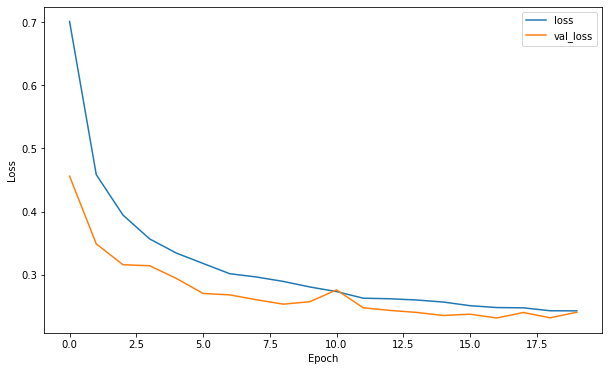

In [13]:
plt.figure(figsize=(10,6))
plt.plot(summary_3.loss, label="loss")
plt.plot(summary_3.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

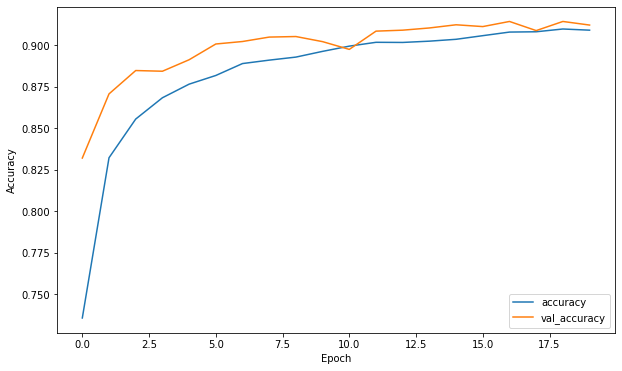

In [14]:
plt.figure(figsize=(10,6))
plt.plot(summary_3.accuracy, label="accuracy")
plt.plot(summary_3.val_accuracy, label="val_accuracy")
plt.legend(loc="lower right")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [15]:
preds = model_2.predict(X_test)
predictions= np.argmax(preds, axis=1)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1000
           1       1.00      0.97      0.99      1000
           2       0.83      0.89      0.86      1000
           3       0.90      0.93      0.91      1000
           4       0.88      0.82      0.85      1000
           5       0.99      0.96      0.98      1000
           6       0.72      0.77      0.74      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [16]:
print(confusion_matrix(y_test, predictions))

[[824   0  23  19   3   1 126   0   4   0]
 [  1 974   1  19   1   0   2   0   2   0]
 [  8   0 887   9  30   0  66   0   0   0]
 [  7   0  11 931  21   0  28   0   2   0]
 [  1   0  77  31 818   0  72   0   1   0]
 [  0   0   0   1   0 964   0  23   0  12]
 [ 78   0  67  24  58   0 765   0   8   0]
 [  0   0   0   0   0   3   0 971   1  25]
 [  1   0   7   5   1   2   2   1 981   0]
 [  0   0   0   0   0   3   1  26   0 970]]


# Prediction

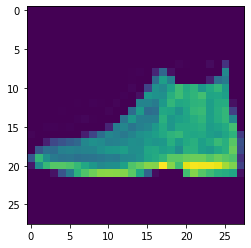

In [18]:
my_number = X_test[0]
plt.imshow(my_number.reshape(28,28))

In [19]:
my_number.shape

(28, 28, 1)

In [21]:
model_2.predict(my_number.reshape(1,28,28,1))

array([[1.2852137e-09, 7.7966306e-13, 5.4077062e-11, 4.0167830e-10,
        8.9373509e-12, 5.2203876e-07, 2.0131896e-09, 3.1343274e-04,
        1.9368041e-09, 9.9968600e-01]], dtype=float32)

In [23]:
np.argmax(model_2.predict(my_number.reshape(1,28,28,1)), axis=1)

array([9], dtype=int64)

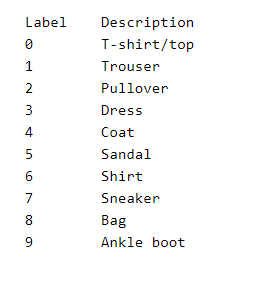

# End of Assignment

In [25]:
model_2.save("cnn-ASS_2.h5")

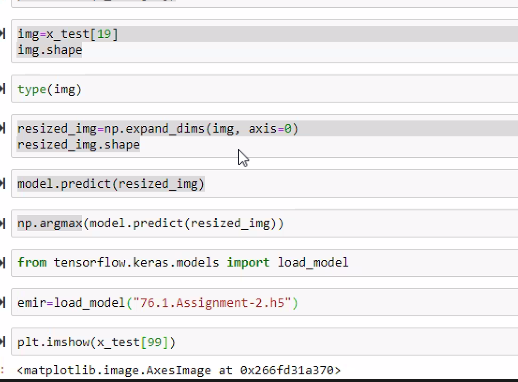

In [2]:
from tensorflow.keras.models import load_model

In [3]:
zah=load_model("cnn-ASS_2.h5")

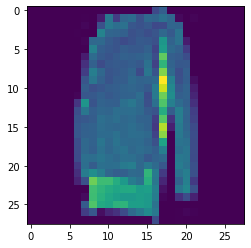

In [7]:
plt.imshow(x_test[66])

In [8]:
np.argmax(zah.predict(x_test[66].reshape(1,28,28,1)), axis=1)

array([4], dtype=int64)

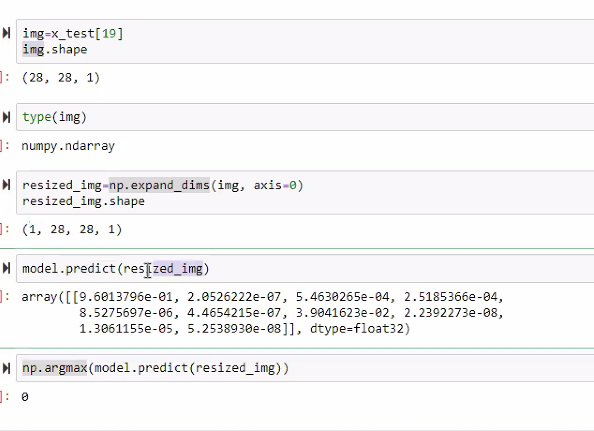

In [9]:
y_test[66]

2